# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
import seaborn as sns;

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score;

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [12]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [13]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [01:20<00:00, 1364.77it/s]


In [16]:
# after preprocesing
project_data['processed_essay'] = preprocessed_essays;
project_data.drop(['essay'], axis=1, inplace=True)
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [17]:
processed_titles = [];
for title in tqdm(project_data['project_title'].values):
    sent = decontracted(title)
    sent = re.sub('\S*\d\S*', '', sent);
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    processed_titles.append(sent.strip())


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 50677.56it/s]


In [18]:
project_data.drop(['project_title'], axis=1, inplace=True)
project_data['processed_titles'] = processed_titles

#testing after preprocessing project_title column
print(processed_titles[3])

print(processed_titles[40]);

print(processed_titles[500]);

print(processed_titles[4000]);

project_data.columns

Techie Kindergarteners
Leveling Books in a Multi Age Class
Classroom Chromebooks for College Bound Seniors
Inspire Summer Reading


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'processed_essay',
       'processed_titles'],
      dtype='object')

## Preprocessing of project_grade_category

In [19]:
print(project_data['project_grade_category'][1])
print(project_data['project_grade_category'][223])
print(project_data['project_grade_category'][134])

Grades 6-8
Grades PreK-2
Grades PreK-2


In [20]:
processed_grades = [];
for grades in project_data['project_grade_category']:
    grades = grades.replace('-', '');
    processed_grades.append(grades)

In [21]:
print(processed_grades[1])
print(processed_grades[223])
print(processed_grades[134])

project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['processed_grades'] = processed_grades

Grades 68
Grades PreK2
Grades PreK2


## Preprocessing of teacher_prefix

In [22]:
print(project_data['teacher_prefix'][2]);
print(project_data['teacher_prefix'][234]);
print(project_data['teacher_prefix'][425]);


Ms.
Ms.
Ms.


In [23]:
preprocessed_teacher_prefix = [];
for prefix in project_data['teacher_prefix']:
    prefix = str(prefix).replace('.', '');
    preprocessed_teacher_prefix.append(prefix);


In [24]:
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data['processed_teacher_prefix'] = preprocessed_teacher_prefix

print(preprocessed_teacher_prefix[321])
print(preprocessed_teacher_prefix[310])

Mrs
Ms


## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'processed_essay',
       'processed_titles', 'processed_grades', 'processed_teacher_prefix'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## Merging Price from resource_Data

In [26]:
price = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index();
project_data = pd.merge(project_data, price, on='id', how='left');
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'processed_essay',
       'processed_titles', 'processed_grades', 'processed_teacher_prefix',
       'price', 'quantity'],
      dtype='object')

## Importing Glove, pretrained model, which we use for word2vec

In [27]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
#splitting project_data into x and y, y=project_is_approved.

#fetching all the columns except project_is_approved.
cols_to_select = [col for col in project_data.columns if col != 'project_is_approved'];
X = project_data[cols_to_select]
print(X.columns)
y = project_data['project_is_approved'];
print(y.shape)

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'processed_essay', 'processed_titles',
       'processed_grades', 'processed_teacher_prefix', 'price', 'quantity'],
      dtype='object')
(109248,)


In [29]:
#splitting project_data into train and test and CV data.
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train, X_cv, y_train, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3, random_state=1, stratify=y_1);

print('shape of train data ', X_train.shape);
print('shape of test data ', X_test.shape);
print('shape of cross validation data ', X_cv.shape)

shape of train data  (53531, 19)
shape of test data  (32775, 19)
shape of cross validation data  (22942, 19)


In [30]:
class ResponseCoding():
    def fit(self, X, y, feature):
        new_x = pd.concat([X[feature], y], axis = 1);
        self.feature = feature;
        self.c = new_x.groupby(feature)['project_is_approved'].mean()
        
    def transform(self, X):
        feature = self.feature;
        if feature + '_0' not in X.columns:
            X.insert(X.shape[1], feature + '_0', np.zeros(X.shape[0]))
        if feature + '_1' not in X.columns:
            X.insert(X.shape[1], feature + '_1', np.zeros(X.shape[0]));
        
        for l in self.c.index:
            X.loc[X[feature] == l, [feature+'_1', feature+'_0']] = self.c.loc[l], 1-self.c.loc[l];
        
        X[feature+'_1'].fillna(0.5, inplace=True)
        X[feature+'_1'].fillna(0.5, inplace=True)
        
        df = X.loc[:,[feature+'_1', feature+'_0']];
        
        return df;

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## Vectorizing Categorical features

In [31]:
#vectorizing school_state
from sklearn.feature_extraction.text import CountVectorizer

#creating object of ResponseCoding class
rc = ResponseCoding();

#vectorizing school_state using ResponseCoding
rc.fit(X_train, y_train, 'school_state');
school_state_vector = rc.transform(X_train);
test_school_state_vector = rc.transform(X_test);
cv_school_state_vector = rc.transform(X_cv);


print('shape of matrix after response coding of school_state for train data ', school_state_vector.shape);
print('shape of matrix after response coding of school_state for test data ', test_school_state_vector.shape);
print('shape of matrix after response coding of school_state for cv data ', cv_school_state_vector.shape);

features_name_list = [];
features_name_list.extend(school_state_vector.columns);
print(features_name_list);

shape of matrix after response coding of school_state for train data  (53531, 2)
shape of matrix after response coding of school_state for test data  (32775, 2)
shape of matrix after response coding of school_state for cv data  (22942, 2)
['school_state_1', 'school_state_0']


In [32]:
#vectorizing categories


#creating object of ResponseCoding class
rc = ResponseCoding();

#vectorizing clean_categories using ResponseCoding
rc.fit(X_train, y_train, 'clean_categories');

categories_vector = rc.transform(X_train);
test_categories_vector = rc.transform(X_test);
cv_categories_vector = rc.transform(X_cv);

print('shape of matrix after response coding of clean_categories for train data', categories_vector.shape)
print('shape of matrix after response coding of clean_categories for test data', test_categories_vector.shape)
print('shape of matrix after response coding of clean_categories for cv data', cv_categories_vector.shape)

features_name_list.extend( categories_vector.columns);
print(features_name_list)

shape of matrix after response coding of clean_categories for train data (53531, 2)
shape of matrix after response coding of clean_categories for test data (32775, 2)
shape of matrix after response coding of clean_categories for cv data (22942, 2)
['school_state_1', 'school_state_0', 'clean_categories_1', 'clean_categories_0']


In [33]:
#vectorizing subcategories

#creating object of ResponseCoding class
rc = ResponseCoding();

#vectorizing clean_categories using ResponseCoding
rc.fit(X_train, y_train, 'clean_subcategories');

subcategories_vector = rc.transform(X_train);
test_subcategories_vector = rc.transform(X_test);
cv_subcategories_vector = rc.transform(X_cv);

print('shape of matrix after response coding of clean_subcategories for train data', subcategories_vector.shape)
print('shape of matrix after response coding of clean_subcategories for test data', test_subcategories_vector.shape)
print('shape of matrix after response coding of clean_subcategories for cv data', cv_subcategories_vector.shape)

features_name_list.extend( subcategories_vector.columns);

shape of matrix after response coding of clean_subcategories for train data (53531, 2)
shape of matrix after response coding of clean_subcategories for test data (32775, 2)
shape of matrix after response coding of clean_subcategories for cv data (22942, 2)


In [34]:
#vectorizing project_grade_category

#creating object of ResponseCoding class
rc = ResponseCoding();

#vectorizing clean_categories using ResponseCoding
rc.fit(X_train, y_train, 'processed_grades');

grade_vector = rc.transform(X_train);
test_grade_vector = rc.transform(X_test);
cv_grade_vector = rc.transform(X_cv);

print('shape of matrix after response coding of grade_category for train data', grade_vector.shape)
print('shape of matrix after response coding of grade_category for test data', test_grade_vector.shape)
print('shape of matrix after response coding of grade_category for cv data', cv_grade_vector.shape)

features_name_list.extend( grade_vector.columns);
print(features_name_list)

shape of matrix after response coding of grade_category for train data (53531, 2)
shape of matrix after response coding of grade_category for test data (32775, 2)
shape of matrix after response coding of grade_category for cv data (22942, 2)
['school_state_1', 'school_state_0', 'clean_categories_1', 'clean_categories_0', 'clean_subcategories_1', 'clean_subcategories_0', 'processed_grades_1', 'processed_grades_0']


In [35]:
#vectorizing teacher_prefix

# teacher_prefix_dict = dict(X_train['processed_teacher_prefix'].value_counts());

# vectorizer = CountVectorizer(vocabulary=list(teacher_prefix_dict.keys()), lowercase=False, binary=True);

# vectorizer.fit(X_train['processed_teacher_prefix'].values.astype('U'));

#creating object of ResponseCoding class
rc = ResponseCoding();

#vectorizing clean_categories using ResponseCoding
rc.fit(X_train, y_train, 'processed_teacher_prefix');

teacher_prefix_vector = rc.transform(X_train);
test_teacher_prefix_vector = rc.transform(X_test);
cv_teacher_prefix_vector = rc.transform(X_cv);

print('shape of matrix after response coding of teacher_prefix for train data', teacher_prefix_vector.shape)
print('shape of matrix after response coding of teacher_prefix for test data', test_teacher_prefix_vector.shape)
print('shape of matrix after response coding of teacher_prefix for cv data', cv_teacher_prefix_vector.shape)

features_name_list.extend( teacher_prefix_vector.columns);
print(features_name_list)

shape of matrix after response coding of teacher_prefix for train data (53531, 2)
shape of matrix after response coding of teacher_prefix for test data (32775, 2)
shape of matrix after response coding of teacher_prefix for cv data (22942, 2)
['school_state_1', 'school_state_0', 'clean_categories_1', 'clean_categories_0', 'clean_subcategories_1', 'clean_subcategories_0', 'processed_grades_1', 'processed_grades_0', 'processed_teacher_prefix_1', 'processed_teacher_prefix_0']


## Encoding Numerical data

In [36]:
#vectorizing price

from sklearn.preprocessing import StandardScaler
price_normalizer = StandardScaler()
#configuring StandarScaler to obtain the mean and variance.
price_normalizer.fit(X_train['price'].values.reshape(-1, 1));

# Now standardize the data with maen and variance obtained above.
price_standardized = price_normalizer.transform(X_train['price'].values.reshape(-1, 1))
test_price_standardized = price_normalizer.transform(X_test['price'].values.reshape(-1, 1))
cv_price_standardized = price_normalizer.transform(X_cv['price'].values.reshape(-1, 1))

features_name_list.append('price');

In [37]:
#vectorizing teacher_number_of_previously_posted_projects

teacher_normalizer = StandardScaler();

teacher_normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

teacher_number_standardized = teacher_normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1));

test_teacher_number_standardized = teacher_normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1));

cv_teacher_number_standardized = teacher_normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1));

features_name_list.append('teacher number of previously posted projects');

In [38]:
#vectorizing quantity:

quantity_normalizer = StandardScaler();

quantity_normalizer.fit(X_train['quantity'].values.reshape(-1, 1));

quantity_standardized = quantity_normalizer.transform(X_train['quantity'].values.reshape(-1, 1))

test_quantity_standardized = quantity_normalizer.transform(X_test['quantity'].values.reshape(-1, 1))

cv_quantity_standardized = quantity_normalizer.transform(X_cv['quantity'].values.reshape(-1, 1))

features_name_list.append('quantity');

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## Vectorizing using BOW on train data

In [39]:
#vectorizing essay

#configure CountVectorizer with word to occur in at least 10 documents.
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000);

vectorizer.fit(X_train['processed_essay']);

#transforming essay into vector
essay_bow = vectorizer.transform(X_train['processed_essay']);
cv_essay_bow = vectorizer.transform(X_cv['processed_essay']);
test_essay_bow = vectorizer.transform(X_test['processed_essay']);

print('Shape of matrix after one hot encoding for train data: ', essay_bow.shape);
print('Shape of matrix after one hot encoding for test data: ', test_essay_bow.shape);
print('Shape of matrix after one hot encoding for cv data: ', cv_essay_bow.shape);


Shape of matrix after one hot encoding for train data:  (53531, 5000)
Shape of matrix after one hot encoding for test data:  (32775, 5000)
Shape of matrix after one hot encoding for cv data:  (22942, 5000)


In [40]:
bow_features_name = vectorizer.get_feature_names()
len(bow_features_name)

5000

In [41]:
#vectorizing project_title

#configure CountVectorizer with word to occur in at least 10 documents.
vectorizer = CountVectorizer();

vectorizer.fit(X_train['processed_titles']);

#transforming title into vector
title_bow = vectorizer.transform(X_train['processed_titles']);
cv_title_bow = vectorizer.transform(X_cv['processed_titles']);
test_title_bow = vectorizer.transform(X_test['processed_titles']);

print('Shape of matrix after one hot encoding for train data: ', title_bow.shape);
print('Shape of matrix after one hot encoding for test data: ', test_title_bow.shape);
print('Shape of matrix after one hot encoding for cv data: ', cv_title_bow.shape);


Shape of matrix after one hot encoding for train data:  (53531, 12226)
Shape of matrix after one hot encoding for test data:  (32775, 12226)
Shape of matrix after one hot encoding for cv data:  (22942, 12226)


In [42]:
bow_features_name.extend(vectorizer.get_feature_names())
print(len(bow_features_name))


17226


In [43]:
len(features_name_list)

13

In [44]:
final_bow_featues_name = [];
final_bow_featues_name.extend(features_name_list);
final_bow_featues_name.extend(bow_features_name);
print(len(final_bow_featues_name))

17239


## Vectorizing using tf-idf

In [45]:
#vectorizing essay

#importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#configuring TfidfVectorizer with a word to occur atleast in 10 documnets.
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)

vectorizer.fit(X_train['processed_essay']);

#vectorizing essay using tfidf
essay_tfidf = vectorizer.transform(X_train['processed_essay']);
test_essay_tfidf = vectorizer.transform(X_test['processed_essay']);
cv_essay_tfidf = vectorizer.transform(X_cv['processed_essay']);

print("Shape of matrix after one hot encoding for train data: ",essay_tfidf.shape)
print("Shape of matrix after one hot encoding for test data: ",test_essay_tfidf.shape)
print("Shape of matrix after one hot encoding for cv data: ",cv_essay_tfidf.shape)

Shape of matrix after one hot encoding for train data:  (53531, 5000)
Shape of matrix after one hot encoding for test data:  (32775, 5000)
Shape of matrix after one hot encoding for cv data:  (22942, 5000)


In [46]:
#vectorizing project_title

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000);

vectorizer.fit(X_train['processed_titles']);

title_tfidf = vectorizer.transform(X_train['processed_titles']);
test_title_tfidf = vectorizer.transform(X_test['processed_titles']);
cv_title_tfidf = vectorizer.transform(X_cv['processed_titles']);

print('Shape of title_tfidf after one hot encoding for train data ', title_tfidf.shape)
print('Shape of title_tfidf after one hot encoding for test data ', test_title_tfidf.shape)
print('Shape of title_tfidf after one hot encoding for cv data ', cv_title_tfidf.shape)

Shape of title_tfidf after one hot encoding for train data  (53531, 5000)
Shape of title_tfidf after one hot encoding for test data  (32775, 5000)
Shape of title_tfidf after one hot encoding for cv data  (22942, 5000)


## Vectorizing using avg w2v on train

In [47]:
#vectorizing essay

essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v.append(vector)

#printing number of documents
print(len(essay_avg_w2v))

#printing dimension of each essay avg w2v
print(len(essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 53531/53531 [00:18<00:00, 2840.14it/s]


53531
300


In [48]:
#vectorizing project_title

title_avg_w2v = [];
for sentance in tqdm(X_train['processed_titles']):
    vector = np.zeros(300);
    cnt_words = 0;
    for word in sentance.split():
        if word in glove_words:
            vector += model[word];
            cnt_words += 1;
    if cnt_words != 0:
        vector /= cnt_words;
    title_avg_w2v.append(vector);

print(len(title_avg_w2v));
print(len(title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 103802.77it/s]


53531
300


## Vectorizing using avg w2v on CV

In [49]:
#vectorizing essay

cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_essay_avg_w2v.append(vector)

#printing number of documents
print(len(cv_essay_avg_w2v))

#printing dimension of each essay avg w2v
print(len(cv_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:08<00:00, 2756.07it/s]


22942
300


In [50]:
#vectorizing project_title

cv_title_avg_w2v = [];
for sentance in tqdm(X_cv['processed_titles']):
    vector = np.zeros(300);
    cnt_words = 0;
    for word in sentance.split():
        if word in glove_words:
            vector += model[word];
            cnt_words += 1;
    if cnt_words != 0:
        vector /= cnt_words;
    cv_title_avg_w2v.append(vector);

print(len(cv_title_avg_w2v));
print(len(cv_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 99806.27it/s]


22942
300


## Vectorizing using avg w2v on test data

In [51]:
#vectorizing essay

test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_essay_avg_w2v.append(vector)

#printing number of documents
print(len(test_essay_avg_w2v))

#printing dimension of each essay avg w2v
print(len(test_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:11<00:00, 2900.85it/s]


32775
300


In [52]:
#vectorizing project_title

test_title_avg_w2v = [];
for sentance in tqdm(X_test['processed_titles']):
    vector = np.zeros(300);
    cnt_words = 0;
    for word in sentance.split():
        if word in glove_words:
            vector += model[word];
            cnt_words += 1;
    if cnt_words != 0:
        vector /= cnt_words;
    test_title_avg_w2v.append(vector);

print(len(test_title_avg_w2v));
print(len(test_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 100287.59it/s]


32775
300


## Vectorizing using tfidf weighted w2v

In [53]:
#finding out tfidf words and corresponding idf value for essay

tfidf_model = TfidfVectorizer()

tfidf_model.fit(X_train['processed_essay'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))

tfidf_words = set(tfidf_model.get_feature_names())

In [54]:
#vectorizing essay

essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v.append(vector)

print(len(essay_tfidf_w2v))
print(len(essay_tfidf_w2v[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 53531/53531 [02:31<00:00, 352.69it/s]


53531
300


In [55]:
#vectorizing essay

cv_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_essay_tfidf_w2v.append(vector)

print(len(cv_essay_tfidf_w2v))
print(len(cv_essay_tfidf_w2v[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [01:02<00:00, 367.08it/s]


22942
300


In [56]:
#vectorizing essay

test_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['processed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_essay_tfidf_w2v.append(vector)

print(len(test_essay_tfidf_w2v))
print(len(test_essay_tfidf_w2v[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [01:25<00:00, 384.74it/s]


32775
300


In [57]:
#finding out tfidf words and corresponding idf value for project_title

tfidf_model = TfidfVectorizer()

tfidf_model.fit(X_train['processed_titles'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))

tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
#vectorizing project_tile

title_tfidf_w2v = [];

for sentance in tqdm(X_train['processed_titles']):
    vector = np.zeros(300);
    tfidf_weight = 0;
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            tfidf = dictionary[word] * (sentance.count(word) / len(sentance.split()));
            vector = tfidf * model[word];
            tfidf_weight += tfidf;
    if tfidf_weight != 0:
        vector /= tfidf_weight;
    title_tfidf_w2v.append(vector);

print(len(title_tfidf_w2v))
print(len(title_tfidf_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 58989.23it/s]


53531
300


In [59]:
#vectorizing project_tile

cv_title_tfidf_w2v = [];

for sentance in tqdm(X_cv['processed_titles']):
    vector = np.zeros(300);
    tfidf_weight = 0;
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            tfidf = dictionary[word] * (sentance.count(word) / len(sentance.split()));
            vector = tfidf * model[word];
            tfidf_weight += tfidf;
    if tfidf_weight != 0:
        vector /= tfidf_weight;
    cv_title_tfidf_w2v.append(vector);

print(len(cv_title_tfidf_w2v))
print(len(cv_title_tfidf_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 58410.66it/s]


22942
300


In [60]:
#vectorizing project_tile

test_title_tfidf_w2v = [];

for sentance in tqdm(X_test['processed_titles']):
    vector = np.zeros(300);
    tfidf_weight = 0;
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            tfidf = dictionary[word] * (sentance.count(word) / len(sentance.split()));
            vector = tfidf * model[word];
            tfidf_weight += tfidf;
    if tfidf_weight != 0:
        vector /= tfidf_weight;
    test_title_tfidf_w2v.append(vector);

print(len(test_title_tfidf_w2v))
print(len(test_title_tfidf_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 58248.79it/s]


32775
300


In [61]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'processed_essay',
       'processed_titles', 'processed_grades', 'processed_teacher_prefix',
       'price', 'quantity'],
      dtype='object')

In [62]:
from scipy.sparse import hstack

#concatinating train data 
#with bow
train_set_1 = hstack((school_state_vector, categories_vector, subcategories_vector, grade_vector, teacher_prefix_vector, price_standardized, teacher_number_standardized, quantity_standardized, essay_bow, title_bow)).tocsr()

#with tfidf
train_set_2 = hstack((school_state_vector, categories_vector, subcategories_vector, grade_vector, teacher_prefix_vector, price_standardized, teacher_number_standardized, quantity_standardized, essay_tfidf, title_tfidf)).tocsr()
                     
#with avg w2v
train_set_3 = hstack((school_state_vector, categories_vector, subcategories_vector, grade_vector, teacher_prefix_vector, price_standardized, teacher_number_standardized, quantity_standardized, essay_avg_w2v, title_avg_w2v)).tocsr()

#with tfidf wt w2v
train_set_4 = hstack((school_state_vector, categories_vector, subcategories_vector, grade_vector, teacher_prefix_vector, price_standardized, teacher_number_standardized, quantity_standardized, essay_tfidf_w2v, title_tfidf_w2v)).tocsr()

#concatinating cv data
#with bow
cv_set_1 = hstack((cv_school_state_vector, cv_categories_vector, cv_subcategories_vector, cv_grade_vector, cv_teacher_prefix_vector, cv_price_standardized, cv_teacher_number_standardized, cv_quantity_standardized, cv_essay_bow, cv_title_bow)).tocsr()

#with tfidf
cv_set_2 = hstack((cv_school_state_vector, cv_categories_vector, cv_subcategories_vector, cv_grade_vector, cv_teacher_prefix_vector, cv_price_standardized, cv_teacher_number_standardized, cv_quantity_standardized, cv_essay_tfidf, cv_title_tfidf)).tocsr()

#with avg w2v
cv_set_3 = hstack((cv_school_state_vector, cv_categories_vector, cv_subcategories_vector, cv_grade_vector, cv_teacher_prefix_vector, cv_price_standardized, cv_teacher_number_standardized, cv_quantity_standardized, cv_essay_avg_w2v, cv_title_avg_w2v)).tocsr()

#with tfidf wt w2v
cv_set_4 = hstack((cv_school_state_vector, cv_categories_vector, cv_subcategories_vector, cv_grade_vector, cv_teacher_prefix_vector, cv_price_standardized, cv_teacher_number_standardized, cv_quantity_standardized, cv_essay_tfidf_w2v, cv_title_tfidf_w2v)).tocsr()


#concatinating test data
#with bow
test_set_1 = hstack((test_school_state_vector, test_categories_vector, test_subcategories_vector, test_grade_vector, test_teacher_prefix_vector, test_price_standardized, test_teacher_number_standardized, test_quantity_standardized, test_essay_bow, test_title_bow)).tocsr()

#with tfidf
test_set_2 = hstack((test_school_state_vector, test_categories_vector, test_subcategories_vector, test_grade_vector, test_teacher_prefix_vector, test_price_standardized, test_teacher_number_standardized, test_quantity_standardized, test_essay_tfidf, test_title_tfidf)).tocsr()

#with avg w2v
test_set_3 = hstack((test_school_state_vector, test_categories_vector, test_subcategories_vector, test_grade_vector, test_teacher_prefix_vector, test_price_standardized, test_teacher_number_standardized, test_quantity_standardized, test_essay_avg_w2v, test_title_avg_w2v)).tocsr()

#with tfidf wt w2v
test_set_4 = hstack((test_school_state_vector, test_categories_vector, test_subcategories_vector, test_grade_vector, test_teacher_prefix_vector, test_price_standardized, test_teacher_number_standardized, test_quantity_standardized, test_essay_tfidf_w2v, test_title_tfidf_w2v)).tocsr()






<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [63]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

train_auc_for_3d = [];
cv_auc_for_3d = [];

#defining list of alpha's
max_depth = [1, 5, 10, 50, 100, 500, 1000];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        RF = RandomForestClassifier(max_depth = d, n_estimators = estimator, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
        RF.fit(train_set_1, y_train);
        
        y_train_pred = RF.predict_proba(train_set_1)[:, 1];
        y_cv_pred = RF.predict_proba(cv_set_1)[:, 1];
        
        t_auc = roc_auc_score(y_train, y_train_pred);
        c_auc = roc_auc_score(y_cv, y_cv_pred);
        
        train_auc_temp.append(t_auc);
        cv_auc_temp.append(c_auc);

        train_auc_for_3d.append(t_auc);
        cv_auc_for_3d.append(c_auc);
        
    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
    
n_estimators_list = np.repeat(n_estimators, 7);
max_depth_list = max_depth + max_depth + max_depth + max_depth + max_depth;
        

In [141]:
#plotting auc values obtained above
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=n_estimators_list,y=max_depth_list,z=train_auc_for_3d, name = 'train')
trace2 = go.Scatter3d(x=n_estimators_list,y=max_depth_list,z=cv_auc_for_3d, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [87]:

train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];


Text(33.0, 0.5, 'n_estimators')

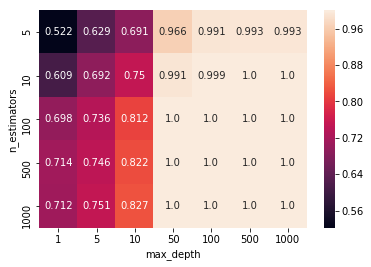

In [88]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

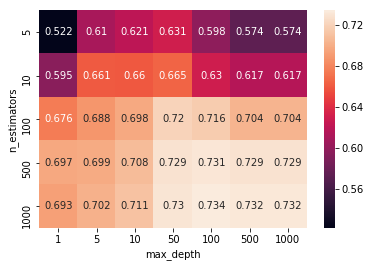

In [89]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

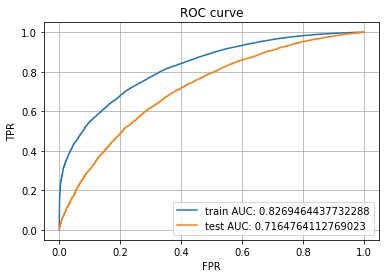

In [64]:
from sklearn.metrics import roc_auc_score;

#obtained optimal values 
set1_max_depth = 10;
set1_n_estimators = 1000;

RF = RandomForestClassifier(max_depth = set1_max_depth, n_estimators = set1_n_estimators, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
RF.fit(train_set_1, y_train);

y_train_pred = RF.predict_proba(train_set_1)[:, 1];
y_test_pred = RF.predict_proba(test_set_1)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
set1_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5498380496832331 for threshold 0.504


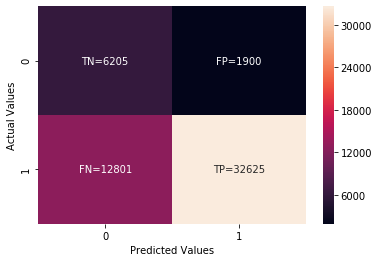

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.43774789185695423 for threshold 0.506


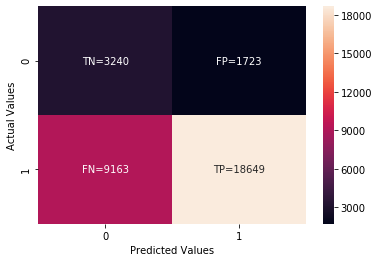

In [67]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, test_thresholds, test_fpr, test_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

## GBDT on BOW, set 1

In [90]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 3, 5, 7, 9];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        XGB = xgb.XGBClassifier(max_depth=d, n_estimators=estimator, learning_rate=0.05);
        XGB.fit(train_set_1, y_train);
        
        y_train_pred = XGB.predict_proba(train_set_1)[:, 1];
        y_cv_pred = XGB.predict_proba(cv_set_1)[:, 1];
        
        t_auc = roc_auc_score(y_train, y_train_pred);
        c_auc = roc_auc_score(y_cv, y_cv_pred);
        
        train_auc_temp.append(t_auc);
        cv_auc_temp.append(c_auc);

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
    
n_estimators_list = np.repeat(n_estimators, 7);
max_depth_list = max_depth + max_depth + max_depth + max_depth + max_depth;
        

In [91]:

train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];


Text(33.0, 0.5, 'n_estimators')

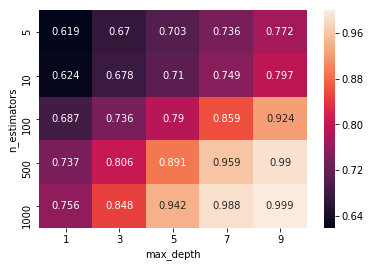

In [92]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

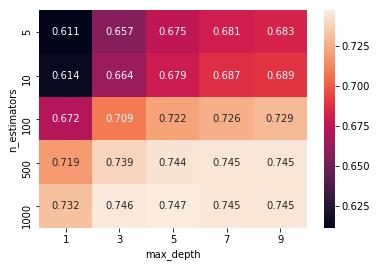

In [93]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

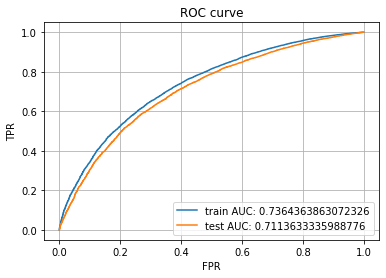

In [68]:
from sklearn.metrics import roc_auc_score;
import xgboost as xgb

#obtained optimal values 
xgb_set1_max_depth = 3;
xgb_set1_n_estimators = 100;

RF = xgb.XGBClassifier(max_depth=xgb_set1_max_depth, n_estimators=xgb_set1_n_estimators, learning_rate=0.05);
RF.fit(train_set_1, y_train);

y_train_pred = RF.predict_proba(train_set_1)[:, 1];
y_test_pred = RF.predict_proba(test_set_1)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
xgb_set1_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.455383721878018 for threshold 0.847


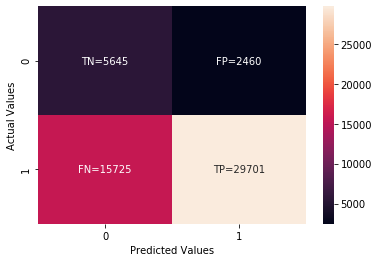

In [69]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax=sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.455383721878018 for threshold 0.847


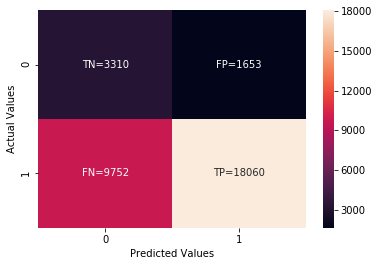

In [70]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax=sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

<h2>Random Forest on tfidf, set 2 </h2>

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 5, 10, 50, 100, 500, 1000];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        RF = RandomForestClassifier(max_depth = d, n_estimators = estimator, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
        RF.fit(train_set_2, y_train);
        
        y_train_pred = RF.predict_proba(train_set_2)[:, 1];
        y_cv_pred = RF.predict_proba(cv_set_2)[:, 1];
        
        train_auc_temp.append(roc_auc_score(y_train, y_train_pred));
        cv_auc_temp.append(roc_auc_score(y_cv, y_cv_pred));

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
       

In [96]:

train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];


Text(33.0, 0.5, 'n_estimators')

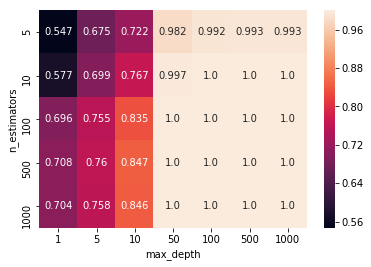

In [97]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

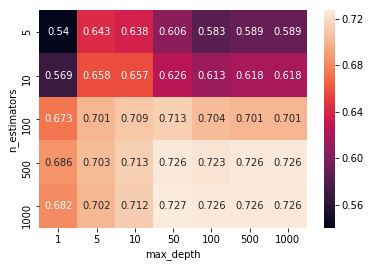

In [98]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

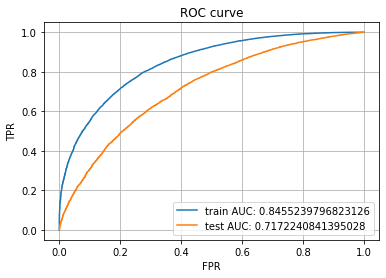

In [71]:
from sklearn.metrics import roc_auc_score;

#obtained optimal values 
set2_max_depth = 10;
set2_n_estimators = 1000;

RF = RandomForestClassifier(max_depth = set2_max_depth, n_estimators = set2_n_estimators, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
RF.fit(train_set_2, y_train);

y_train_pred = RF.predict_proba(train_set_2)[:, 1];
y_test_pred = RF.predict_proba(test_set_2)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
set2_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5780824114484057 for threshold 0.502


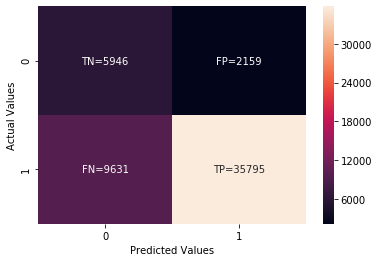

In [72]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4333267096983665 for threshold 0.51


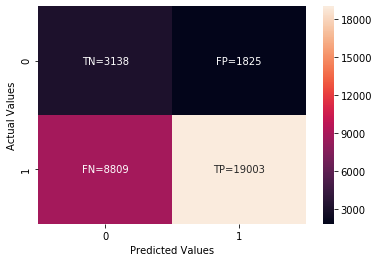

In [73]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, test_fpr, test_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

## GBDT on tfidf, set 2

In [99]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 3, 5, 7, 9];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        XGB = xgb.XGBClassifier(max_depth=d, n_estimators=estimator, learning_rate=0.05);
        XGB.fit(train_set_2, y_train);
        
        y_train_pred = XGB.predict_proba(train_set_2)[:, 1];
        y_cv_pred = XGB.predict_proba(cv_set_2)[:, 1];
        
        t_auc = roc_auc_score(y_train, y_train_pred);
        c_auc = roc_auc_score(y_cv, y_cv_pred);
        
        train_auc_temp.append(t_auc);
        cv_auc_temp.append(c_auc);

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
    


In [100]:

train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];


Text(33.0, 0.5, 'n_estimators')

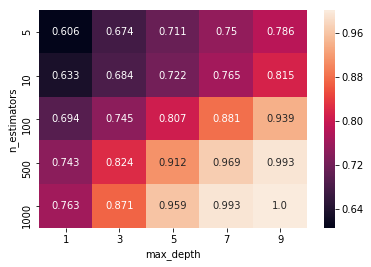

In [101]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

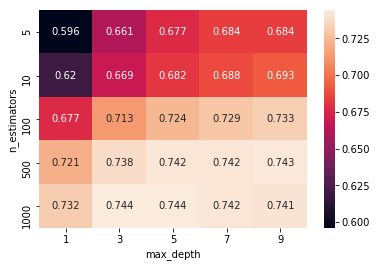

In [102]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

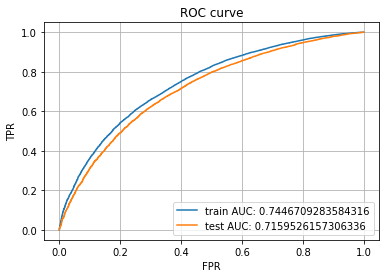

In [88]:

#obtained optimal values 
xgb_set2_max_depth = 3;
xgb_set2_n_estimators = 100;

RF = xgb.XGBClassifier(max_depth=xgb_set2_max_depth, n_estimators=xgb_set2_n_estimators, learning_rate=0.05);
RF.fit(train_set_2, y_train);

y_train_pred = RF.predict_proba(train_set_2)[:, 1];
y_test_pred = RF.predict_proba(test_set_2)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
xgb_set2_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.46186419531675643 for threshold 0.846


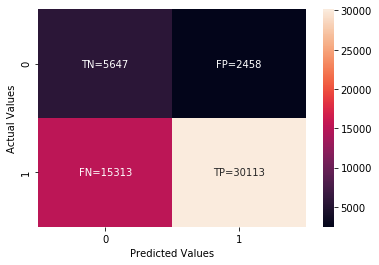

In [89]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="")
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.46186419531675643 for threshold 0.846


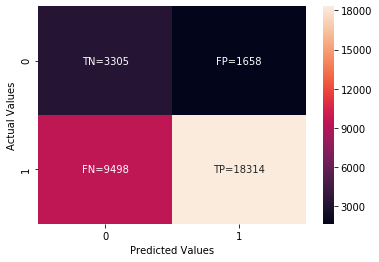

In [90]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

<h2>Random Forest on avg w2v, set 3 </h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 5, 10, 50, 100, 500, 1000];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        RF = RandomForestClassifier(max_depth = d, n_estimators = estimator, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
        RF.fit(train_set_3, y_train);
        
        
        y_train_pred = RF.predict_proba(train_set_3)[:, 1];
        y_cv_pred = RF.predict_proba(cv_set_3)[:, 1];
        
        train_auc_temp.append(roc_auc_score(y_train, y_train_pred));
        cv_auc_temp.append(roc_auc_score(y_cv, y_cv_pred));

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
       

In [ ]:

train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];


Text(33.0, 0.5, 'n_estimators')

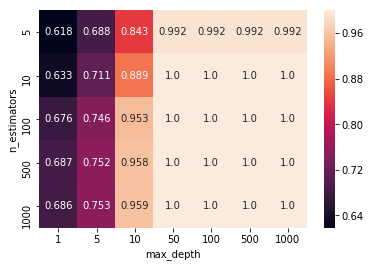

In [ ]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

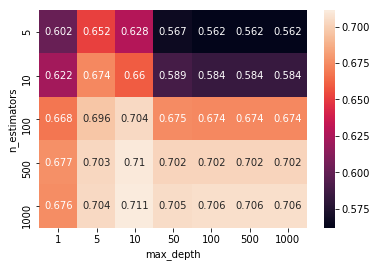

In [ ]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

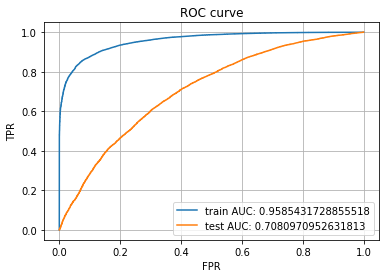

In [76]:
from sklearn.metrics import roc_auc_score;

#obtained optimal values 
set3_max_depth = 10;
set3_n_estimators = 1000;

RF = RandomForestClassifier(max_depth = set3_max_depth, n_estimators = set3_n_estimators, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
RF.fit(train_set_3, y_train);

y_train_pred = RF.predict_proba(train_set_3)[:, 1];
y_test_pred = RF.predict_proba(test_set_3)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
set3_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))

plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.7919455801957386 for threshold 0.542


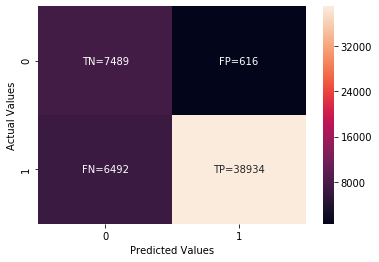

In [77]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.7919455801957386 for threshold 0.542


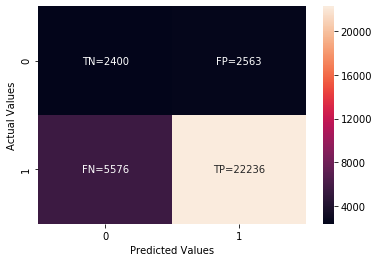

In [78]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

## GBDT on avg w2v, set3

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 3, 5, 7, 9];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        XGB = xgb.XGBClassifier(max_depth=d, n_estimators=estimator, learning_rate=0.05);
        XGB.fit(train_set_3, y_train);
        
        y_train_pred = XGB.predict_proba(train_set_3)[:, 1];
        y_cv_pred = XGB.predict_proba(cv_set_3)[:, 1];
        
        t_auc = roc_auc_score(y_train, y_train_pred);
        c_auc = roc_auc_score(y_cv, y_cv_pred);
        
        train_auc_temp.append(t_auc);
        cv_auc_temp.append(c_auc);

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
    


In [ ]:
train_auc = [[round(train_auc[i][j], 4) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 4) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];

Text(33.0, 0.5, 'n_estimators')

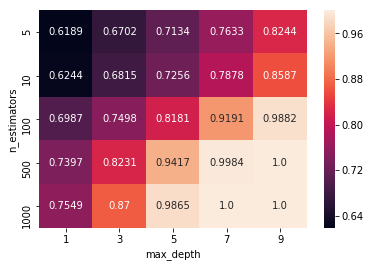

In [ ]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

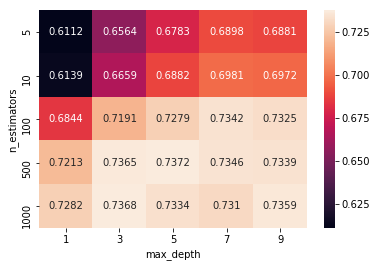

In [ ]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

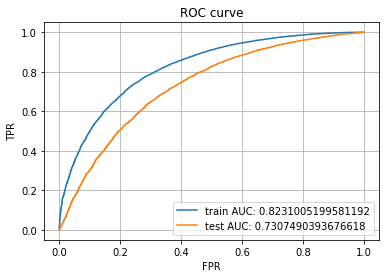

In [81]:

#obtained optimal values 
xgb_set3_max_depth = 3;
xgb_set3_n_estimators = 500;

RF = xgb.XGBClassifier(max_depth=xgb_set3_max_depth, n_estimators=xgb_set3_n_estimators, learning_rate=0.05);
RF.fit(train_set_3, y_train);

y_train_pred = RF.predict_proba(train_set_3)[:, 1];
y_test_pred = RF.predict_proba(test_set_3)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
xgb_set3_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5571505424839248 for threshold 0.84


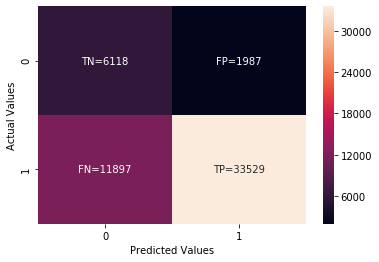

In [82]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.5571505424839248 for threshold 0.84


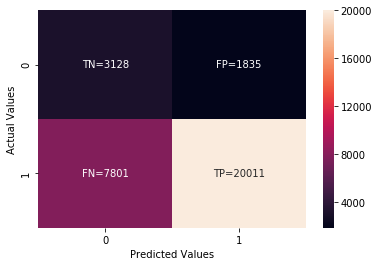

In [83]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

<h2>Random Forest on tfidf wtd avg w2v, set 4 </h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 5, 10, 50, 100, 500, 1000];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        RF = RandomForestClassifier(max_depth = d, n_estimators = estimator, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
        RF.fit(train_set_4, y_train);
        
        y_train_pred = RF.predict_proba(train_set_4)[:, 1];
        y_cv_pred = RF.predict_proba(cv_set_4)[:, 1];
        
        train_auc_temp.append(roc_auc_score(y_train, y_train_pred));
        cv_auc_temp.append(roc_auc_score(y_cv, y_cv_pred));

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
       

In [ ]:
train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];

Text(33.0, 0.5, 'n_estimators')

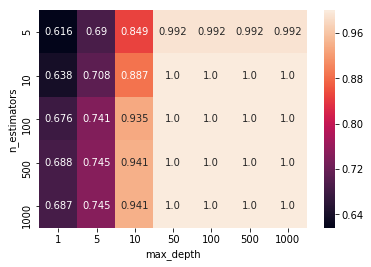

In [ ]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33.0, 0.5, 'n_estimators')

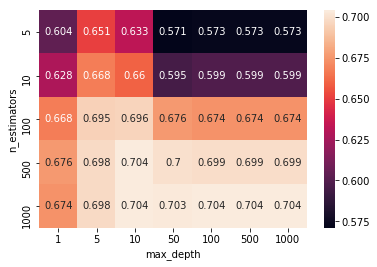

In [ ]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

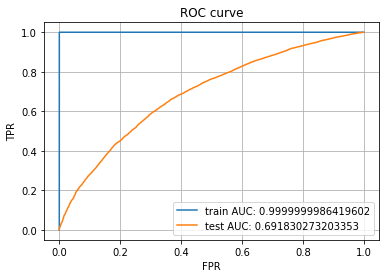

In [92]:
from sklearn.metrics import roc_auc_score;

#obtained optimal values 
set4_max_depth = 500;
set4_n_estimators = 1000;

RF = RandomForestClassifier(max_depth = set4_max_depth, n_estimators = set4_n_estimators, n_jobs = -1, random_state = 23, class_weight="balanced_subsample");
RF.fit(train_set_4, y_train);

y_train_pred = RF.predict_proba(train_set_4)[:, 1];
y_test_pred = RF.predict_proba(test_set_4)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
set4_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.9999779861753181 for threshold 0.732


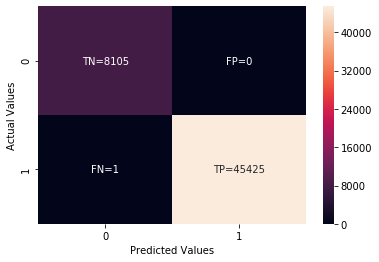

In [93]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax=sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.9999779861753181 for threshold 0.732


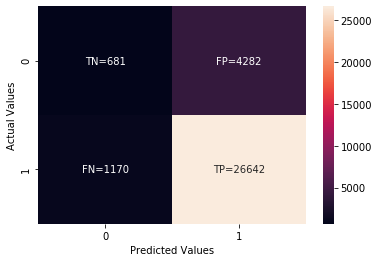

In [94]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax=sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

## GBDT on tfidf wtd avg w2v, set4

In [64]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score;

#creating list for holding auc value for train, cv
train_auc = [];
cv_auc = [];

#defining list of alpha's
max_depth = [1, 3, 5, 7, 9];
n_estimators  = [5, 10, 100, 500, 1000];

for estimator in n_estimators:
    train_auc_temp = [];
    cv_auc_temp = [];
    for d in max_depth:
        XGB = xgb.XGBClassifier(max_depth=d, n_estimators=estimator, learning_rate=0.05);
        XGB.fit(train_set_4, y_train);
        
        y_train_pred = XGB.predict_proba(train_set_4)[:, 1];
        y_cv_pred = XGB.predict_proba(cv_set_4)[:, 1];
        
        t_auc = roc_auc_score(y_train, y_train_pred);
        c_auc = roc_auc_score(y_cv, y_cv_pred);
        
        train_auc_temp.append(t_auc);
        cv_auc_temp.append(c_auc);

    train_auc.append(train_auc_temp);
    cv_auc.append(cv_auc_temp);
    


In [65]:
train_auc = [[round(train_auc[i][j], 3) for j in range(len(train_auc[1]))] for i in range(len(train_auc))];
cv_auc = [[round(cv_auc[i][j], 3) for j in range(len(cv_auc[1]))] for i in range(len(cv_auc))];

Text(33,0.5,'n_estimators')

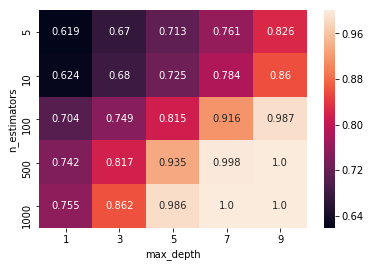

In [66]:
sns.heatmap(train_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

Text(33,0.5,'n_estimators')

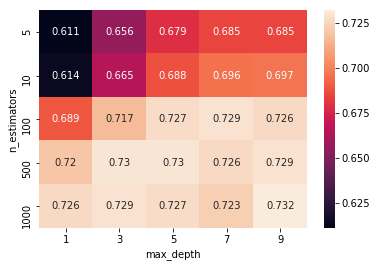

In [67]:
sns.heatmap(cv_auc,  annot=True, fmt='', yticklabels=n_estimators, xticklabels=max_depth);
plt.xlabel("max_depth");
plt.ylabel("n_estimators")

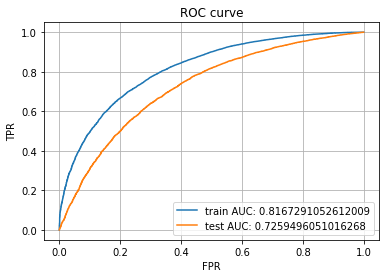

In [85]:

#obtained optimal values 
xgb_set4_max_depth = 3;
xgb_set4_n_estimators = 500;

RF = xgb.XGBClassifier(max_depth=xgb_set4_max_depth, n_estimators=xgb_set4_n_estimators, learning_rate=0.05);
RF.fit(train_set_4, y_train);

y_train_pred = RF.predict_proba(train_set_4)[:, 1];
y_test_pred = RF.predict_proba(test_set_4)[:, 1];

#obtaining auc value
train_auc = roc_auc_score(y_train, y_train_pred);
test_auc = roc_auc_score(y_test, y_test_pred);
xgb_set4_auc = test_auc;

#obtaining fpr, tpr and thresholds
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred);
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred);

#plotting ROC curve
plt.plot(train_fpr, train_tpr, label="train AUC: "+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC: "+str(test_auc))


plt.grid();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();
plt.show()


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5420208984394576 for threshold 0.838


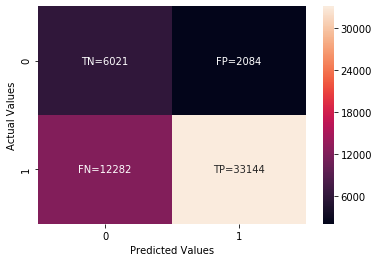

In [86]:

print("Train confusion matrix")
pred_output_train = predict(y_train_pred, train_thresholds, train_fpr, train_tpr);

train_cm = confusion_matrix(y_train, pred_output_train)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(train_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(train_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.5420208984394576 for threshold 0.838


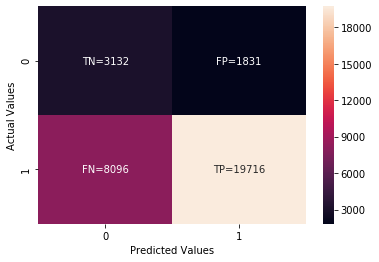

In [87]:
print("Test confusion matrix")
pred_output_test = predict(y_test_pred, train_thresholds, train_fpr, train_tpr);
test_cm = confusion_matrix(y_test, pred_output_test)

labels = np.array(["{0}={1}".format(text, auc) for auc, text in zip(test_cm.flatten(), ['TN', 'FP', 'FN', 'TP'])]).reshape(2,2);

ax = sns.heatmap(test_cm, annot=labels, fmt="");
ax.set_ylim(2.0,0)

plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');

<h1>3. Conclusion</h1>

In [95]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

table = PrettyTable();
table.field_names = ['Vectorizer', 'Model', 'Hyper parameter(max_depth)', 'Hyper Parameter(n_estimators)', 'AUC'];

table.add_row(['RF BOW', 'Brute', set1_max_depth, set1_n_estimators, set1_auc]);
table.add_row(['RF TFIDF', 'Brute', set2_max_depth, set2_n_estimators, set2_auc]);
table.add_row(['RF W2V', 'Brute', set3_max_depth, set3_n_estimators, set3_auc]);
table.add_row(['RF TFIDFW2V', 'Brute', set4_max_depth, set4_n_estimators, set4_auc]);
table.add_row(['XGBoost BOW', 'Brute', xgb_set1_max_depth, xgb_set1_n_estimators, xgb_set1_auc]);
table.add_row(['XGBoost TFIDF', 'Brute', xgb_set2_max_depth, xgb_set2_n_estimators, xgb_set2_auc]);
table.add_row(['XGBoost W2V', 'Brute', xgb_set3_max_depth, xgb_set3_n_estimators, xgb_set3_auc]);
table.add_row(['XGBoost TFIDFW2V', 'Brute', xgb_set4_max_depth, xgb_set4_n_estimators, xgb_set4_auc]);
print(table)

+------------------+-------+----------------------------+-------------------------------+--------------------+
|    Vectorizer    | Model | Hyper parameter(max_depth) | Hyper Parameter(n_estimators) |        AUC         |
+------------------+-------+----------------------------+-------------------------------+--------------------+
|      RF BOW      | Brute |             10             |              1000             | 0.7164764112769023 |
|     RF TFIDF     | Brute |             10             |              1000             | 0.7172240841395028 |
|      RF W2V      | Brute |             10             |              1000             | 0.7080970952631813 |
|   RF TFIDFW2V    | Brute |            500             |              1000             | 0.691830273203353  |
|   XGBoost BOW    | Brute |             3              |              100              | 0.7113633335988776 |
|  XGBoost TFIDF   | Brute |             3              |              100              | 0.7159526157306336 |
|